In [10]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plots, graphs 
import os, json, sys   #
plt.style.use('ggplot')

#preprocessing
import re
import seaborn as sns

#inflection
# pip install inflection
# it singularize or pluralize a string
# it camelize also like 'device_type' into devicetype

#NLTK

import nltk
#nltk.download()
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
stemmer = WordNetLemmatizer()
from nltk import PorterStemmer
PorterStemmer().stem('complications')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
from nltk.stem.api import StemmerI
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string

#sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from collections import Counter


AttributeError: module 'nltk' has no attribute 'data'

In [9]:
summary=[]
labeles=[]

HOME_DIR = os.getcwd()
Bugs_DIR = os.path.join(HOME_DIR,"bugs")


json_files = [pos_json for pos_json in os.listdir(Bugs_DIR) if pos_json.endswith('.json')]

json_data = []
for count,value in enumerate(json_files):
	with open(os.path.join(Bugs_DIR,value), 'r',encoding='cp850') as datafile:
		temp_data = json.load(datafile)
		print(f"File:{value} <> Reports: {len(temp_data['bugs'])}")
		json_data.extend(temp_data["bugs"])

print(f"Total Reports: {len(json_data)}")
df = pd.DataFrame(json_data)
print(f"Reports in DataFrame: {len(df)}")

#print(bugs_dataFrame.head)
df.drop(['severity','description','id','product','status'],axis=1,inplace=True)
df.info
summaryy=[]
summaryy = df.summary
labels = df.resolution
print(summaryy[23882])

pro= pd.read_csv("C:/Users/Ali/Desktop/processed.csv")
summary=[]
summary=pro.summary
#print((summary[42422])
print(f"Length of Summary:{len(summary)}")
print(f"Length of Labels:{len(labels)}")
wordd=[]
countt=[]

for cont in summary:
    #print((cont))
    tokens= [t for t in cont.split()]
    for i in tokens:
        wordd.append(i)
#print(wordd)
words_to_count = (word for word in wordd if word[:1].isupper())
c = Counter(words_to_count)
print (c.most_common(10))
freq=nltk.FreqDist(tokens)
for key, val in freq.items():
    #print(str(key)+':'+str(val))
    freq.plot(5, cumulative= False)
    

                        
                 
                 

File:bugzilla.json <> Reports: 5324
File:Calendar.json <> Reports: 1785
File:Camino Graveyard.json <> Reports: 1290
File:Core Graveyard.json <> Reports: 888
File:Core.json <> Reports: 7228
File:Firefox.json <> Reports: 7368
File:MailNews Core.json <> Reports: 2796
File:SeaMonkey.json <> Reports: 8716
File:Thunderbird.json <> Reports: 5129
File:Toolkit.json <> Reports: 1899
Total Reports: 42423
Reports in DataFrame: 42423
Update tab's permanentKey as part of _swapBrowserDocShells
Length of Summary:42423
Length of Labels:42423


NameError: name 'Counter' is not defined

In [ ]:
label=[]
for x in range(len(labels)):
  #print(labels[x])
  if labels[x]=="FIXED":
    labels[x]=1
  elif labels[x]=="WONTFIX":
    labels[x]=0
  elif labels[x]=="INVALID":
    labels[x]=0
  elif labels[x]=="INCOMPLETE":
    labels[x]=0
  elif labels[x]=="WONTFIX":
    labels[x]=0
  elif labels[x]=="WORKSFORME":
    labels[x]=0
  elif labels[x]=="EXPIRED":
    labels[x]=0
  elif labels[x]=="DUPLICATE":
    labels[x]=0
  elif labels[x]=="":
    labels[x]=0
  label.append(labels[x])
print("Lables:",len(label))
print("summary:",len(summary))



In [ ]:
#Now use the CountVectorizer provided by the scikit-learn library to vectorize sentences. 
#It takes the words of each sentence and creates a vocabulary of all the unique words in the sentences.
#This vocabulary can then be used to create a feature vector of the count of the words:
#encoder = LabelEncoder()
#label = encoder.fit_transform(label)
label=np.array(label)
vectorizer = CountVectorizer(min_df=0, lowercase=True)
vectorizer.fit(summary)
vectorizer.vocabulary_

In [14]:
#vectorizer.transform(summary).toarray()

In [15]:
sentences_train, sentences_test, y_train, y_test = train_test_split(summary, label, test_size=0.25, random_state=1000)

In [16]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [17]:
#CNN

In [18]:
input_dim = X_train.shape[1] 
# Number of features

model = Sequential()
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1043000   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,043,101
Trainable params: 1,043,101
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/10
3182/3182 [==============================] - 28s 9ms/step - loss: 0.4874 - accuracy: 0.8047 - val_loss: 0.4816 - val_accuracy: 0.8073
Epoch 2/10
3182/3182 [==============================] - 33s 10ms/step - loss: 0.4473 - accuracy: 0.8113 - val_loss: 0.4971 - val_accuracy: 0.8020
Epoch 3/10
3182/3182 [==============================] - 27s 9ms/step - loss: 0.3928 - accuracy: 0.8419 - val_loss: 0.5207 - val_accuracy: 0.7918
Epoch 4/10
3182/3182 [==============================] - 24s 8ms/step - loss: 0.3197 - accuracy: 0.8783 - val_loss: 0.5619 - val_accuracy: 0.7713
Epoch 5/10
3182/3182 [==============================] - 24s 8ms/step - loss: 0.2530 - accuracy: 0.9074 - val_loss: 0.6137 - val_accuracy: 0.7651
Epoch 6/10
3182/3182 [==============================] - 25s 8ms/step - loss: 0.1997 - accuracy: 0.9285 - val_loss: 0.6721 - val_accuracy: 0.7599
Epoch 7/10
3182/3182 [==============================] - 25s 8ms/step - loss: 0.1575 - accuracy: 0.9450 - val_loss: 0.7473 - val_a

In [21]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.752499
Precision: 0.248264
Recall: 0.139853
F1 score: 0.178918
Cohens kappa: 0.046409
ROC AUC: 0.527609


Text(0.5, 257.44, 'Predicted label')

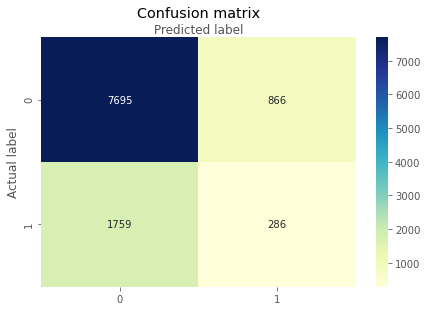

In [22]:
yhat_probs = model.predict(X_test, verbose=0)
predicted_labels = model.predict_classes(X_test, verbose=0)
#predicted_labels = (model.predict(X_test> 1).astype("int32"))
yhat_probs = yhat_probs[:, 0]
accuracy = accuracy_score(y_test, predicted_labels)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, predicted_labels)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted_labels)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted_labels)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, predicted_labels)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predicted_labels)
cnf_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')